可以看出这里的ADF结果为-16.3， p-value小于0.05,  1%的结果-3.43>ADF的结果-16.3，所以说明极其显著拒绝原假设，不存在单位根，所以可以得出结论本数据是平稳的。

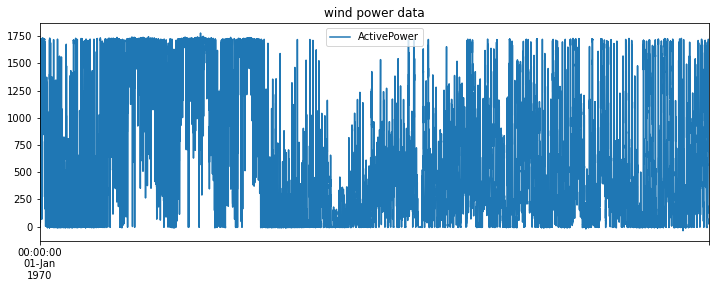

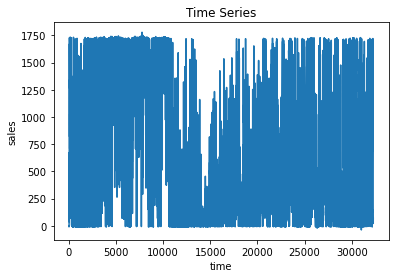

ADF result is (-16.30038937853678, 3.2707195260468536e-29, 13, 32270, {'1%': -3.43055265944375, '5%': -2.861629570227577, '10%': -2.566817675458531}, 420329.0080700645)
纯随机检查结果为         lb_stat  lb_pvalue
1  29811.874737        0.0


In [50]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
 
# 加载风电功率数据
filename = r'F:\wind power pre\data2\handle_Turbine_Data .csv'
data = pd.read_csv(filename, usecols=[0])
data.index = pd.to_datetime(data.index)

 
# 可视化
data.plot(figsize=(12,4))
plt.title('wind power data')
plt.show()
import  pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
#画时序图
filename = r'F:\wind power pre\data2\handle_Turbine_Data .csv'
data = pd.read_csv(filename, usecols=[0])
train_data = data[:-9685]
test_data = data[-9685:]
plt.plot(data)
plt.xlabel('time')
plt.ylabel('sales')
plt.title('Time Series')
plt.show()
#平稳性检测
print('ADF result is',ADF(data))
#纯随机检查
print('纯随机检查结果为',acorr_ljungbox(data,lags=1)) #lags表示延迟期数

In [2]:
from statsmodels.tsa.stattools import arma_order_select_ic
print('BIC求解的模型阶次为',arma_order_select_ic(data,max_ar=17,max_ma=4,ic='bic')['bic_min_order'])

E:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail

BIC求解的模型阶次为 (8, 2)


In [51]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,order=(8,1,2)).fit()




In [58]:
print(model.summary()) #给出一份模型报告
print(model.forecast(10)) #作为期10天的预测，返回预测结果、标准误差、置信区间。

                               SARIMAX Results                                
Dep. Variable:            ActivePower   No. Observations:                32284
Model:                 ARIMA(8, 1, 2)   Log Likelihood             -210390.848
Date:                Tue, 27 Sep 2022   AIC                         420803.696
Time:                        21:40:10   BIC                         420895.901
Sample:                             0   HQIC                        420833.178
                              - 32284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.039     -1.776      0.076      -0.147       0.007
ar.L2          0.7930      0.033     23.925      0.000       0.728       0.858
ar.L3          0.0412      0.004     10.407      0.0

In [72]:
print(model.forecast(9685))

32284    104.352519
32285    134.449270
32286    161.898128
32287    186.225556
32288    209.387524
            ...    
41964    695.532447
41965    695.532447
41966    695.532447
41967    695.532447
41968    695.532447
Name: predicted_mean, Length: 9685, dtype: float64


In [97]:
pred = model.forecast(9685)
original=test_data.iloc[:,0:1]['ActivePower']


In [100]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(pred, original)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(pred, original))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(pred, original)
mape = mean_absolute_percentage_error(pred, original)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)
print('平均绝对百分误差: %.6f' % mape)

均方误差: 295645.363571
均方根误差: 543.732805
平均绝对误差: 480.871956
平均绝对百分误差: 0.692612
